# We will import the files,  we first will import the dataset from the kaggle files. 

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/final-dataset/private_predictions_label0.csv
/kaggle/input/final-dataset/PrivateTest_data_images.npy
/kaggle/input/facial-expression-recognition/Training_data_labels.npy
/kaggle/input/facial-expression-recognition/Training_data_images.npy
/kaggle/input/facial-expression-recognition/predictions_label0.csv
/kaggle/input/facial-expression-recognition/PublicTest_data_images.npy


# Importing  the Libraries 

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D,SpatialDropout2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
import keras
from keras.initializers import Constant
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [60]:
from os.path import join
image_size = 48
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']
dataset_directory = '/kaggle/input/facial-expression-recognition/'  ## CHANGE TO YOUR OWN DIRECTORY
images_train = np.load(join(dataset_directory, 'Training_data_images.npy'))
labels_train = np.load(join(dataset_directory, 'Training_data_labels.npy'))
images_test_public = np.load(join(dataset_directory, 'PublicTest_data_images.npy'))
images_train = images_train.reshape([-1, image_size, image_size])


images_test_public = images_test_public.reshape([-1, image_size, image_size])


print(images_train.shape)
print(labels_train.shape)
print(images_test_public.shape)


(9328, 48, 48)
(9328,)
(1136, 48, 48)


# Conventional Machine Learning Model 

Reshaping to work on conventional machine learning model


In [61]:
img_array = images_train.reshape(9328,48*48)

splitting the dataset for conventional_machine_learning 

In [62]:
!pip install sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_array,labels_train, test_size=0.2, stratify = labels_train, random_state = 5)

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


 # Decission Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

print("Accuracy: %.6f" %accuracy_score(y_test, y_pred))

Accuracy: 0.371383


In [65]:
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))


Confusion Matrix
 col_0   0   1   2    3   4    5    6
row_0                               
0      71   5  24   60  26   19   48
1       8   9   3    8   2    4    8
2      33   4  49   40  34   29   33
3      52  11  42  290  37   29   86
4      31   2  25   34  43   10   64
5      19   3  20   21  12  110   25
6      52   5  57   80  34   34  121


# k nearest neighbhour

In [66]:
from sklearn.neighbors import KNeighborsClassifier
# Create and training a KNN classifier model with neighbors 20
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [67]:

y_new_pred = knn.predict(X_test)
print("The predicted class is: \n", y_new_pred)


The predicted class is: 
 [0 6 2 ... 0 3 3]


In [68]:
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))


Confusion Matrix
 col_0   0   1   2    3   4    5    6
row_0                               
0      71   5  24   60  26   19   48
1       8   9   3    8   2    4    8
2      33   4  49   40  34   29   33
3      52  11  42  290  37   29   86
4      31   2  25   34  43   10   64
5      19   3  20   21  12  110   25
6      52   5  57   80  34   34  121


# Random Forest Classifier 

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=123456)

In [70]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: %.6f" %accuracy_score(y_test, y_pred))

Accuracy: 0.538049


In [71]:
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))


Confusion Matrix
 col_0   0   1   2    3   4    5    6
row_0                               
0      69   0  13   96   5    7   63
1       9  10   1   15   0    3    4
2      23   0  55   60   8   22   54
3       8   0   1  484   3   13   38
4      28   0   9   46  35    6   85
5       8   0   3   30   3  137   29
6      17   0   9  120  13   10  214


# Multi-Layer Perceptron

In [72]:
from sklearn.neural_network import MLPClassifier
abc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

In [73]:

abc.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [74]:

y_pred = abc.predict(X_test)

print("Accuracy: %.6f" %accuracy_score(y_test, y_pred))
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

Accuracy: 0.406217

Confusion Matrix
 col_0    3   5    6
row_0              
0       77  35  141
1       14   6   22
2       58  25  139
3      439   1  107
4       45  27  137
5       22  77  111
6      107  34  242


#  **Convolutional neural networks**

In [75]:
images_train_cnn= images_train.reshape(9328,48,48,1)
images_test_public_cnn = images_test_public.reshape(1136,48,48,1)


In [76]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images_train_cnn, labels_train, test_size = 0.05, random_state=45)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(images_train_cnn, labels_train, test_size = 0.05, random_state=45)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (7462, 2304)
y_train shape:  (7462,)
X_test shape:  (1866, 2304)


**Inspired by work of Dr.Ian Goodfellow's work on 
Challenges in representation learning: A report on three machine learning contests**

https://www.sciencedirect.com/science/article/pii/S0893608014002159 

In [77]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1),))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(1024,(3,3), padding='same'))

# Flattening
model.add(Flatten())


# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))



opt = Adam(lr=0.0005,beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)      

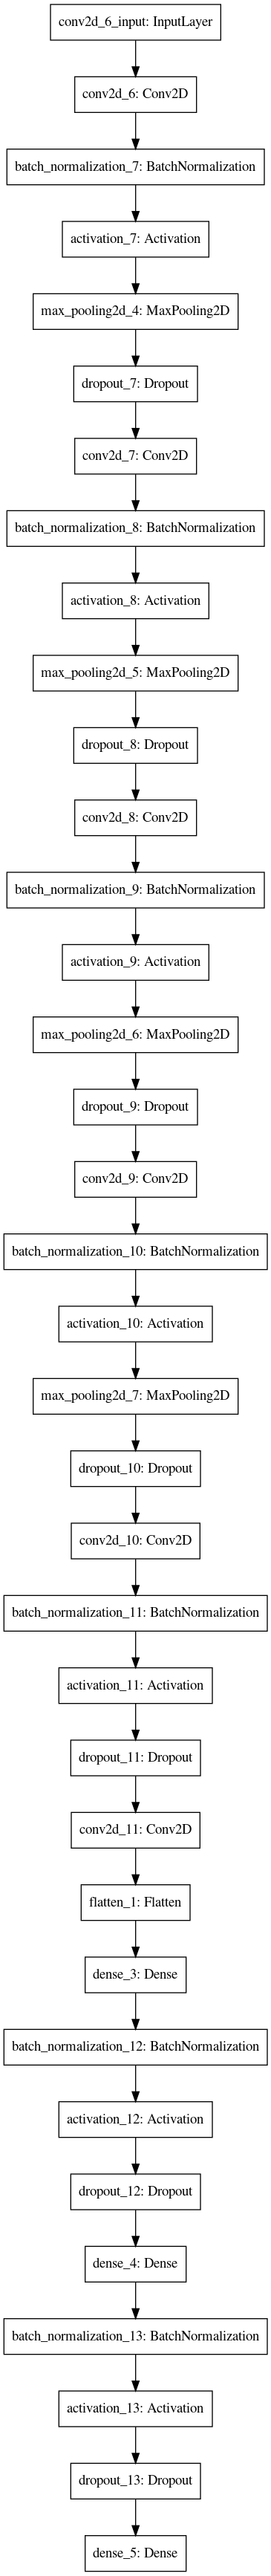

In [78]:
plot_model(model, to_file='model.png')

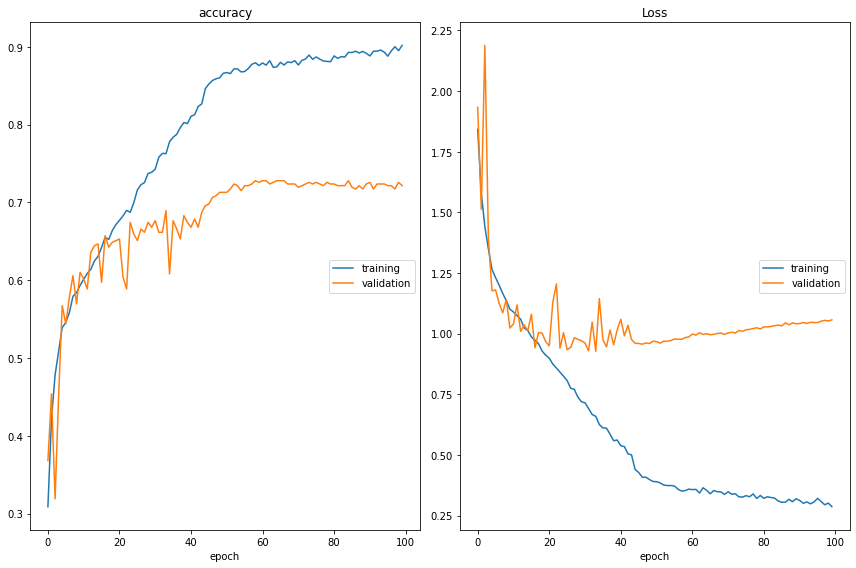

accuracy
	training         	 (min:    0.309, max:    0.902, cur:    0.902)
	validation       	 (min:    0.319, max:    0.728, cur:    0.722)
Loss
	training         	 (min:    0.286, max:    1.843, cur:    0.286)
	validation       	 (min:    0.927, max:    2.188, cur:    1.057)

Epoch 00100: saving model to model_weights.h5
467/466 [==============================] - 7s 16ms/step - loss: 0.2861 - accuracy: 0.9019 - val_loss: 1.0567 - val_accuracy: 0.7216


In [79]:
!pip install livelossplot
from livelossplot import PlotLossesKeras
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.00001,
                              patience=10, min_lr=0.00001, mode='max')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)



#tensorboard = TensorBoard(log_dir='./logs')

callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]


#history = model.fit(X_train,y_train,epochs = 60,validation_data = (X_test,y_test),callbacks = [callbacks])

data_generator = ImageDataGenerator(horizontal_flip=True)

history = model.fit_generator(data_generator.flow(X_train_1,y_train_1,
                                            batch_size=16),
                                          steps_per_epoch= len(y_train) / 16,
                                          epochs=100,
                                           verbose=1,
                                           callbacks=[callbacks],
                                            validation_data=(X_test_1,y_test_1),
                                         #  shuffle=True
                        )
#history = model.fit(X_train,y_train,epochs = 300 ,validation_data = (X_test,y_test),callbacks = [callbacks],shuffle=True)

In [80]:
model.save_weights('model_weights.h5')

In [81]:
model.load_weights('model_weights.h5')

In [82]:
score = model.evaluate(X_val_1, y_val_1, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.0566558837890625
Test accuracy: 0.721627414226532


In [83]:
y_pred = model.predict_classes(X_test_1)

In [84]:
print("\nConfusion Matrix\n",pd.crosstab(y_test_1,y_pred))


Confusion Matrix
 col_0   0  1   2    3   4   5   6
row_0                            
0      36  0   7    6   3   1  10
1       2  7   1    0   0   0   0
2       7  0  27    4   2   6  11
3       1  0   4  127   3   2   4
4       7  0   4    3  25   2  15
5       0  0   2    2   0  48   2
6       5  0   3    6   4   1  67


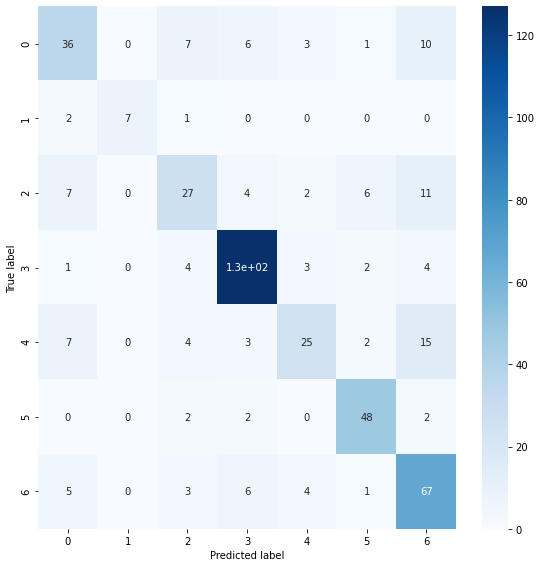

In [85]:
x = pd.crosstab(y_test_1,y_pred)
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(x, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [86]:
model.save('shapes_cnn.h5')

In [87]:
y_pred_1 = model.predict_classes(images_test_public_cnn)
df = pd.DataFrame()

df ["Predictions"] = y_pred_1
df.to_csv("public71.csv")

# PLOTTING THE PROBABILITIES

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = model.predict_proba(X_test_1)[:,1]
y_score2 = dtc.predict_proba(X_test)[:,1]
y_score3 = knn.predict_proba(X_test)[:,1]
y_score4 = clf.predict_proba(X_test)[:,1]
y_score5 = abc.predict_proba(X_test)[:,1]



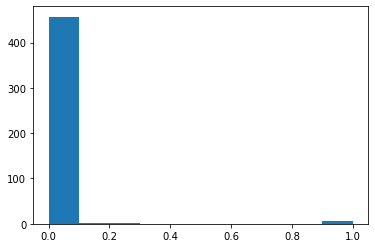

In [89]:
#y_score_1 = np.squeeze(y_score1) # Shape is now: (10, 80)
plt.hist(y_score1) # plotting by columns
plt.show()

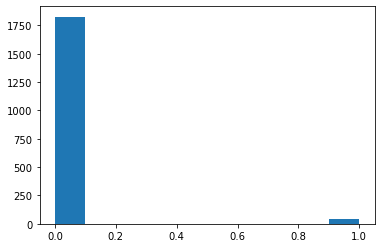

In [90]:
plt.hist(y_score2) # plotting by columns
plt.show()

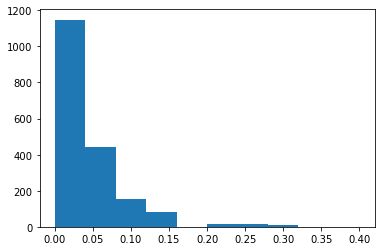

In [91]:
plt.hist(y_score3) # plotting by columns
plt.show()

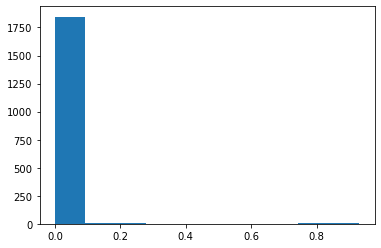

In [92]:
plt.hist(y_score4) # plotting by columns
plt.show()

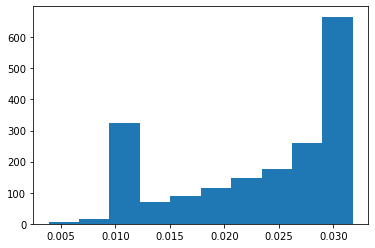

In [93]:
plt.hist(y_score5) # plotting by columns
plt.show()